# Advantage Actor-Critic (DPG)

In this tutorial we use for first time an Actor-Critic agent. This kind of agents extend the Policy-Based agents with a mechanism for estimation of state values V(s), resulting on a mix between Policy and Value Based agents. They are composed of two entities: 1) the Actor which learn the policy and proposed directly the actions and 2) the Critic which estimates the state value V(s). Then, we have two neural networks, one for the Actor and one for the Critic. In some especific situations you may want to use just one neural network with two outputs heads, this can be done implementing your neural network extending the interfaz in RL_Agent.utils.networks.networks_interfaz.py. This funtionality will be revisited in further tutorials.


Aditionally we will see how to change to a different exploration strategy based on exploration rate and how to change the way to selecting actions.

In [1]:
from RL_Problem.base.ActorCritic import a2c_problem
from RL_Agent import a2c_agent_discrete, a2c_agent_discrete_queue
import gym
from RL_Agent.base.utils import agent_saver, history_utils
from RL_Agent.base.utils.networks import networks
from RL_Agent.base.utils.networks import action_selection_options


Bad key savefig.frameon in file /home/shernandez/anaconda3/envs/tf2py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/shernandez/anaconda3/envs/tf2py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/shernandez/anaconda3/envs/tf2py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.

In [2]:
net_architecture = networks.actor_critic_net_architecture(
                    actor_dense_layers=3,                           critic_dense_layers=2,
                    actor_n_neurons=[128, 128, 128],                     critic_n_neurons=[256, 256],
                    actor_dense_activation=['relu', 'relu', 'relu'],        critic_dense_activation=['relu', 'relu']
                    )

In [3]:
def custom_epsilon_decay(decay_rate=0.0001, init_epsilon=1.):
    class epsilon_control:
        def __init__(self, decay_rate, init_epsilon):
            self.decay_rate = decay_rate
            self.init_epsilon = init_epsilon
            self.aux_epsilon = init_epsilon

    eps_control = epsilon_control(decay_rate, init_epsilon)

    def epsilon_decay(epsilon, epsilon_min):
        epsilon = epsilon - eps_control.decay_rate
        if epsilon < epsilon_min:
            eps_control.aux_epsilon = eps_control.aux_epsilon - 0.1
            epsilon = eps_control.aux_epsilon
            if epsilon < 0.1:
                eps_control.aux_epsilon = eps_control.init_epsilon
                epsilon = eps_control.init_epsilon

        return epsilon

    return epsilon_decay

In [4]:
agent = a2c_agent_discrete.Agent(actor_lr=1e-2,
                                      critic_lr=1e-2,
                                      batch_size=128,
                                      epsilon=1.0, 
                                      epsilon_decay=custom_epsilon_decay(decay_rate=0.0001, init_epsilon=1.),
                                      epsilon_min=0.1,
                                      n_step_return=15,
                                      n_stack=4,
                                      net_architecture=net_architecture,
                                      loss_entropy_beta=0.002,
                                      train_action_selection_options=action_selection_options.greedy_action,
                                      action_selection_options=action_selection_options.argmax,
                                      tensorboard_dir='tensorboard_logs')

In [5]:
environment = "LunarLander-v2"
environment = gym.make(environment)

In [6]:
problem = a2c_problem.A2CProblem(environment, agent)

In [7]:
problem.solve(700, render=False, skip_states=1)

2021-12-02 16:36:39.003773: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


Episode:  1 Epochs:  115  Reward: -63.1 Smooth Reward: -63.1  Epsilon: 0.9885
Episode:  2 Epochs:  76  Reward: -273.6 Smooth Reward: -168.4  Epsilon: 0.9809
Episode:  3 Epochs:  67  Reward: -275.6 Smooth Reward: -204.1  Epsilon: 0.9742
Episode:  4 Epochs:  86  Reward: -148.1 Smooth Reward: -190.1  Epsilon: 0.9656
Episode:  5 Epochs:  87  Reward: -157.9 Smooth Reward: -183.6  Epsilon: 0.9569
Episode:  6 Epochs:  140  Reward: -73.4 Smooth Reward: -165.3  Epsilon: 0.9429
Episode:  7 Epochs:  87  Reward: -79.3 Smooth Reward: -153.0  Epsilon: 0.9342
Episode:  8 Epochs:  100  Reward: -399.1 Smooth Reward: -183.8  Epsilon: 0.9242
Episode:  9 Epochs:  75  Reward: -118.7 Smooth Reward: -176.5  Epsilon: 0.9167
Episode:  10 Epochs:  100  Reward: -431.0 Smooth Reward: -202.0  Epsilon: 0.9067
Episode:  11 Epochs:  102  Reward: -119.1 Smooth Reward: -207.6  Epsilon: 0.8965
Episode:  12 Epochs:  79  Reward: -57.1 Smooth Reward: -185.9  Epsilon: 0.8886
Episode:  13 Epochs:  118  Reward: -129.7 Smooth 

Episode:  103 Epochs:  241  Reward: -648.7 Smooth Reward: -358.1  Epsilon: 0.5332
Episode:  104 Epochs:  93  Reward: -473.7 Smooth Reward: -376.6  Epsilon: 0.5239
Episode:  105 Epochs:  145  Reward: -361.3 Smooth Reward: -379.1  Epsilon: 0.5094
Episode:  106 Epochs:  82  Reward: -490.6 Smooth Reward: -390.6  Epsilon: 0.5012
Episode:  107 Epochs:  126  Reward: -355.5 Smooth Reward: -408.9  Epsilon: 0.4886
Episode:  108 Epochs:  133  Reward: -487.3 Smooth Reward: -416.2  Epsilon: 0.4753
Episode:  109 Epochs:  225  Reward: -727.7 Smooth Reward: -458.3  Epsilon: 0.4528
Episode:  110 Epochs:  105  Reward: -486.1 Smooth Reward: -473.1  Epsilon: 0.4423
Episode:  111 Epochs:  161  Reward: -495.4 Smooth Reward: -487.4  Epsilon: 0.4262
Episode:  112 Epochs:  96  Reward: -331.3 Smooth Reward: -485.8  Epsilon: 0.4166
Episode:  113 Epochs:  108  Reward: -450.6 Smooth Reward: -465.9  Epsilon: 0.4058
Episode:  114 Epochs:  106  Reward: -439.0 Smooth Reward: -462.5  Epsilon: 0.3952
Episode:  115 Epoch

Episode:  205 Epochs:  193  Reward: -632.0 Smooth Reward: -332.6  Epsilon: 0.5223
Episode:  206 Epochs:  85  Reward: -282.4 Smooth Reward: -353.6  Epsilon: 0.5138
Episode:  207 Epochs:  88  Reward: -251.6 Smooth Reward: -343.9  Epsilon: 0.5050
Episode:  208 Epochs:  85  Reward: -393.6 Smooth Reward: -332.9  Epsilon: 0.4965
Episode:  209 Epochs:  121  Reward: -177.1 Smooth Reward: -302.8  Epsilon: 0.4844
Episode:  210 Epochs:  78  Reward: -331.8 Smooth Reward: -307.8  Epsilon: 0.4766
Episode:  211 Epochs:  195  Reward: -701.0 Smooth Reward: -329.2  Epsilon: 0.4571
Episode:  212 Epochs:  127  Reward: -335.8 Smooth Reward: -350.7  Epsilon: 0.4444
Episode:  213 Epochs:  92  Reward: -371.8 Smooth Reward: -385.4  Epsilon: 0.4352
Episode:  214 Epochs:  160  Reward: -594.4 Smooth Reward: -407.2  Epsilon: 0.4192
Episode:  215 Epochs:  158  Reward: -267.0 Smooth Reward: -370.6  Epsilon: 0.4034
Episode:  216 Epochs:  232  Reward: -894.3 Smooth Reward: -431.8  Epsilon: 0.3802
Episode:  217 Epochs:

Episode:  307 Epochs:  227  Reward: -1026.2 Smooth Reward: -739.3  Epsilon: 0.1313
Episode:  308 Epochs:  82  Reward: -583.0 Smooth Reward: -754.2  Epsilon: 0.1231
Episode:  309 Epochs:  100  Reward: -760.9 Smooth Reward: -740.8  Epsilon: 0.1131
Episode:  310 Epochs:  212  Reward: -1094.7 Smooth Reward: -796.8  Epsilon: 0.3920
Episode:  311 Epochs:  122  Reward: -571.1 Smooth Reward: -799.8  Epsilon: 0.3798
Episode:  312 Epochs:  112  Reward: -506.0 Smooth Reward: -711.9  Epsilon: 0.3686
Episode:  313 Epochs:  90  Reward: -392.1 Smooth Reward: -699.1  Epsilon: 0.3596
Episode:  314 Epochs:  114  Reward: -308.0 Smooth Reward: -674.7  Epsilon: 0.3482
Episode:  315 Epochs:  98  Reward: -292.4 Smooth Reward: -611.0  Epsilon: 0.3384
Episode:  316 Epochs:  193  Reward: -737.0 Smooth Reward: -627.1  Epsilon: 0.3191
Episode:  317 Epochs:  84  Reward: -311.9 Smooth Reward: -555.7  Epsilon: 0.3107
Episode:  318 Epochs:  109  Reward: -559.1 Smooth Reward: -553.3  Epsilon: 0.2998
Episode:  319 Epoc

Episode:  409 Epochs:  207  Reward: -1237.0 Smooth Reward: -486.3  Epsilon: 0.3161
Episode:  410 Epochs:  134  Reward: -795.3 Smooth Reward: -520.1  Epsilon: 0.3027
Episode:  411 Epochs:  77  Reward: -479.7 Smooth Reward: -528.5  Epsilon: 0.2950
Episode:  412 Epochs:  118  Reward: -470.7 Smooth Reward: -548.3  Epsilon: 0.2832
Episode:  413 Epochs:  249  Reward: -1352.1 Smooth Reward: -618.3  Epsilon: 0.2583
Episode:  414 Epochs:  90  Reward: -418.1 Smooth Reward: -610.2  Epsilon: 0.2493
Episode:  415 Epochs:  180  Reward: -937.5 Smooth Reward: -665.3  Epsilon: 0.2313
Episode:  416 Epochs:  90  Reward: -598.4 Smooth Reward: -706.6  Epsilon: 0.2223
Episode:  417 Epochs:  82  Reward: -393.3 Smooth Reward: -704.4  Epsilon: 0.2141
Episode:  418 Epochs:  80  Reward: -378.5 Smooth Reward: -706.1  Epsilon: 0.2061
Episode:  419 Epochs:  175  Reward: -899.6 Smooth Reward: -672.3  Epsilon: 0.1886
Episode:  420 Epochs:  91  Reward: -375.3 Smooth Reward: -630.3  Epsilon: 0.1795
Episode:  421 Epochs

Episode:  511 Epochs:  150  Reward: -309.8 Smooth Reward: -347.0  Epsilon: 0.5280
Episode:  512 Epochs:  226  Reward: -512.5 Smooth Reward: -362.4  Epsilon: 0.5054
Episode:  513 Epochs:  177  Reward: -745.6 Smooth Reward: -400.8  Epsilon: 0.4877
Episode:  514 Epochs:  118  Reward: -391.6 Smooth Reward: -423.6  Epsilon: 0.4759
Episode:  515 Epochs:  93  Reward: -395.2 Smooth Reward: -427.8  Epsilon: 0.4666
Episode:  516 Epochs:  78  Reward: -483.3 Smooth Reward: -425.6  Epsilon: 0.4588
Episode:  517 Epochs:  145  Reward: -546.5 Smooth Reward: -459.5  Epsilon: 0.4443
Episode:  518 Epochs:  111  Reward: -517.1 Smooth Reward: -467.4  Epsilon: 0.4332
Episode:  519 Epochs:  101  Reward: -506.8 Smooth Reward: -490.9  Epsilon: 0.4231
Episode:  520 Epochs:  171  Reward: -758.5 Smooth Reward: -516.7  Epsilon: 0.4060
Episode:  521 Epochs:  169  Reward: -650.0 Smooth Reward: -550.7  Epsilon: 0.3891
Episode:  522 Epochs:  98  Reward: -323.7 Smooth Reward: -531.8  Epsilon: 0.3793
Episode:  523 Epoch

Episode:  612 Epochs:  170  Reward: -894.4 Smooth Reward: -548.0  Epsilon: 0.3324
Episode:  613 Epochs:  148  Reward: -366.2 Smooth Reward: -564.3  Epsilon: 0.3176
Episode:  614 Epochs:  133  Reward: -553.3 Smooth Reward: -580.8  Epsilon: 0.3043
Episode:  615 Epochs:  377  Reward: -2013.2 Smooth Reward: -752.6  Epsilon: 0.2666
Episode:  616 Epochs:  79  Reward: -545.2 Smooth Reward: -711.5  Epsilon: 0.2587
Episode:  617 Epochs:  131  Reward: -472.1 Smooth Reward: -713.7  Epsilon: 0.2456
Episode:  618 Epochs:  77  Reward: -542.5 Smooth Reward: -702.4  Epsilon: 0.2379
Episode:  619 Epochs:  78  Reward: -422.2 Smooth Reward: -682.3  Epsilon: 0.2301
Episode:  620 Epochs:  108  Reward: -658.7 Smooth Reward: -706.1  Epsilon: 0.2193
Episode:  621 Epochs:  143  Reward: -750.2 Smooth Reward: -721.8  Epsilon: 0.2050
Episode:  622 Epochs:  89  Reward: -495.4 Smooth Reward: -681.9  Epsilon: 0.1961
Episode:  623 Epochs:  81  Reward: -315.3 Smooth Reward: -676.8  Epsilon: 0.1880
Episode:  624 Epochs

In [8]:
problem.test(render=True, n_iter=10)

Test episode:  1 Epochs:  110  Reward: -622.5 Smooth Reward: -622.5  Epsilon: 0.1851
Test episode:  2 Epochs:  78  Reward: -565.4 Smooth Reward: -593.9  Epsilon: 0.1851
Test episode:  3 Epochs:  311  Reward: -3247.8 Smooth Reward: -1478.6  Epsilon: 0.1851
Test episode:  4 Epochs:  77  Reward: -636.6 Smooth Reward: -1268.1  Epsilon: 0.1851
Test episode:  5 Epochs:  131  Reward: -729.7 Smooth Reward: -1160.4  Epsilon: 0.1851
Test episode:  6 Epochs:  78  Reward: -594.6 Smooth Reward: -1066.1  Epsilon: 0.1851
Test episode:  7 Epochs:  257  Reward: -2557.0 Smooth Reward: -1279.1  Epsilon: 0.1851
Test episode:  8 Epochs:  118  Reward: -807.0 Smooth Reward: -1220.1  Epsilon: 0.1851
Test episode:  9 Epochs:  101  Reward: -721.5 Smooth Reward: -1164.7  Epsilon: 0.1851
Test episode:  10 Epochs:  101  Reward: -449.9 Smooth Reward: -1093.2  Epsilon: 0.1851


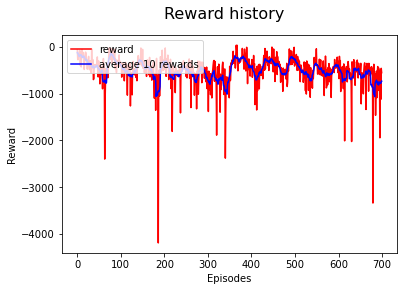

In [9]:
hist = problem.get_histogram_metrics()
history_utils.plot_reward_hist(hist, 10)

In [ ]:
!tensorboard --logdir=tensorboard_logs

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
